<h1> Data Science Salaries 2024 </h1>

<h2> Explicando a base de dados </h2>
<p> A base de dados escolhida em formato csv, trata-se dos salarios de cientista de dados no ano de 2023 por área de atuação e país.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importando dados csv
salarios = pd.read_csv('v7_Latest_Data_Science_Salaries.csv')
#visualizando as 5 primeiras linhas
salarios.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


## Características gerais da base de dados
Aqui vamos analisar a base de dados por completo, verificando todos os dados por linha e coluna

In [3]:
#informação sobre os dados: linhas, colunas, tipo, tamanho e nulos
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


Verificamos que não há nenhum dado nulo em nenhuma das colunas. Aqui também verificamos que salary e salary_in_usd está como tipo inteiro, ou seja, sem pontos e casas decimais.

In [4]:
#Descrição sobre os dados numericos
salarios.describe()

,Salary,Salary in USD,Year
count,5.736000e+03,5736.000000,5736.000000
mean,1.831648e+05,144264.031032,2022.743375
std,5.637801e+05,70646.771842,0.644506
min,1.400000e+04,15000.000000,2020.000000
25%,9.500000e+04,93300.000000,2023.000000
50%,1.397250e+05,136771.500000,2023.000000
75%,1.880000e+05,185000.000000,2023.000000
max,3.040000e+07,750000.000000,2024.000000


Ao dar o describe notamos que a base de dados tem o ano minimo como 2020 e o maximo como 2024.

**Caracteristicas especificadas sem usar info():** <br>
Também podemos verificar a tabela de forma mais detalhada ao usar .columns e .shape, como mostra a execução a seguir

In [5]:
#Vizualização das colunas por array
print("Colunas detalhes: ",salarios.columns) 
#Vizualização das colunas e linhas por quantidade
print("Quantidade de linhas X colunas:",salarios.shape)

Colunas detalhes:  Index(['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level',
       'Salary', 'Salary Currency', 'Company Location', 'Salary in USD',
       'Employee Residence', 'Company Size', 'Year'],
      dtype='object')
Quantidade de linhas X colunas: (5736, 11)


# Limpeza de dados

## Dados duplicados
<p>É importante verificar quantos dados duplicados existem na tabela e se esses dados são importantes ou descartaveis na nossa análise

In [6]:
#Somando todos os dados duplicados
salarios.duplicated().sum()
#Imprimindo 
print(f'São {salarios.duplicated().sum()} valores duplicados')

São 0 valores duplicados


Dados Nulos

In [7]:
salarios.isna().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [8]:
salarios.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

## Checando relações numericas com mapa de calor

In [9]:
salarios.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


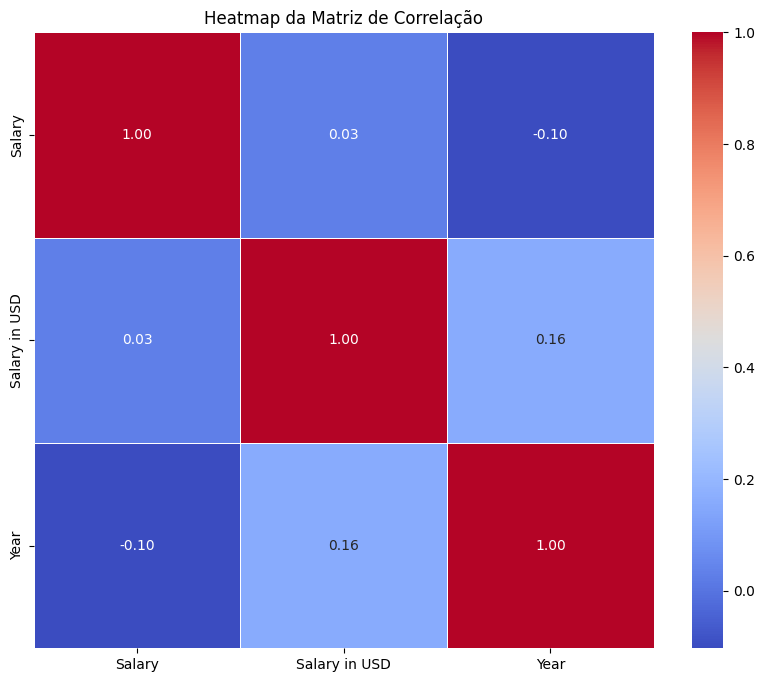

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Selecionar apenas as colunas numéricas
colunas_numericas = salarios.select_dtypes(include=['float64', 'int64']).columns
df_numerico = salarios[colunas_numericas]
 
# Calcular a correlação entre as variáveis numéricas
correlation_matriz = df_numerico.corr()
 
# Criar uma matriz de anotações com os valores formatados
annotations = np.array([[f"{val:.2f}" for val in row] for row in correlation_matriz.to_numpy()])
 
# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matriz, annot=annotations, cmap='coolwarm', fmt='', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

C:\Users\lilit\AppData\Local\Temp\ipykernel_9396\1002743472.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=salarios,x='Year', palette='tab10')


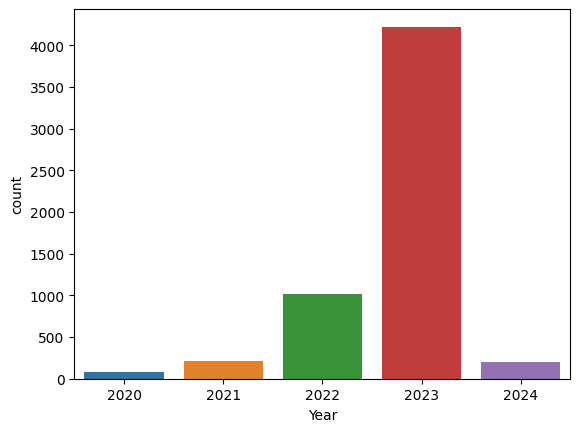

In [11]:
sns.countplot(data=salarios,x='Year', palette='tab10')
plt.show()

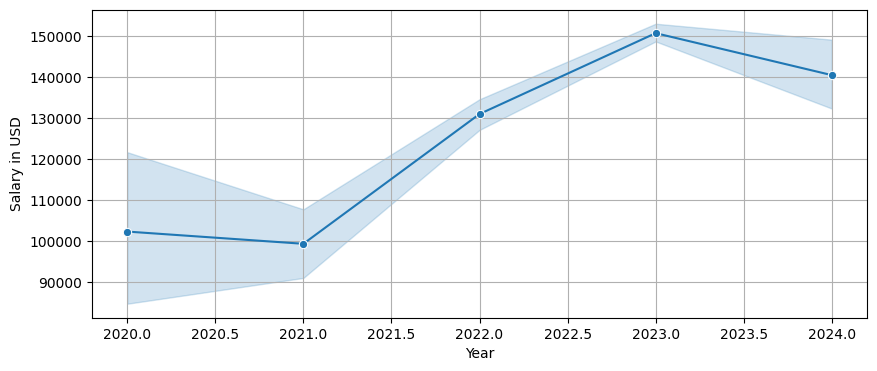

In [12]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=salarios, x="Year", y="Salary in USD", marker='o')
plt.grid(True)
plt.show()

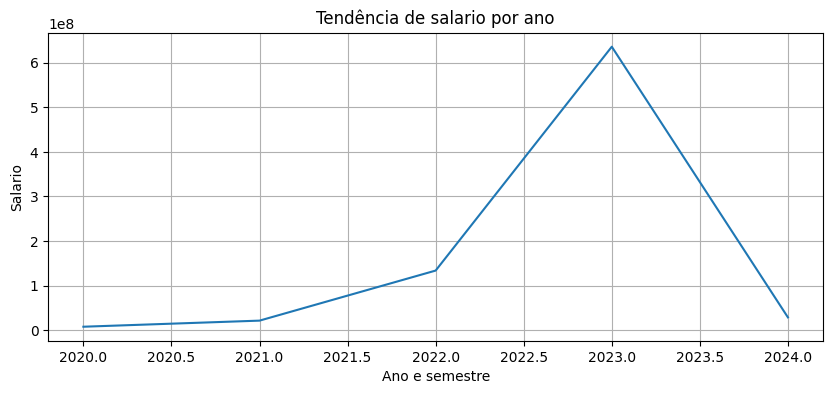

In [13]:
#Relação entre trabalho por ano
plt.figure(figsize=(10, 4))
salario_Ano = salarios.groupby(['Year']).sum()
salario_Ano['Salary in USD'].plot(kind='line')
plt.title('Tendência de salario por ano')
plt.xlabel('Ano e semestre')
plt.ylabel('Salario')
plt.grid(True)
plt.show()

## Qual area com maior quantidade de vagas?

In [35]:
distruibuição_vagas = salarios['Job Title'].nunique()
print(f'São {distruibuição_vagas} áreas na tabela')

São 132 áreas na tabela


Text(0.5, 1.0, 'Top 15 Job Titles')

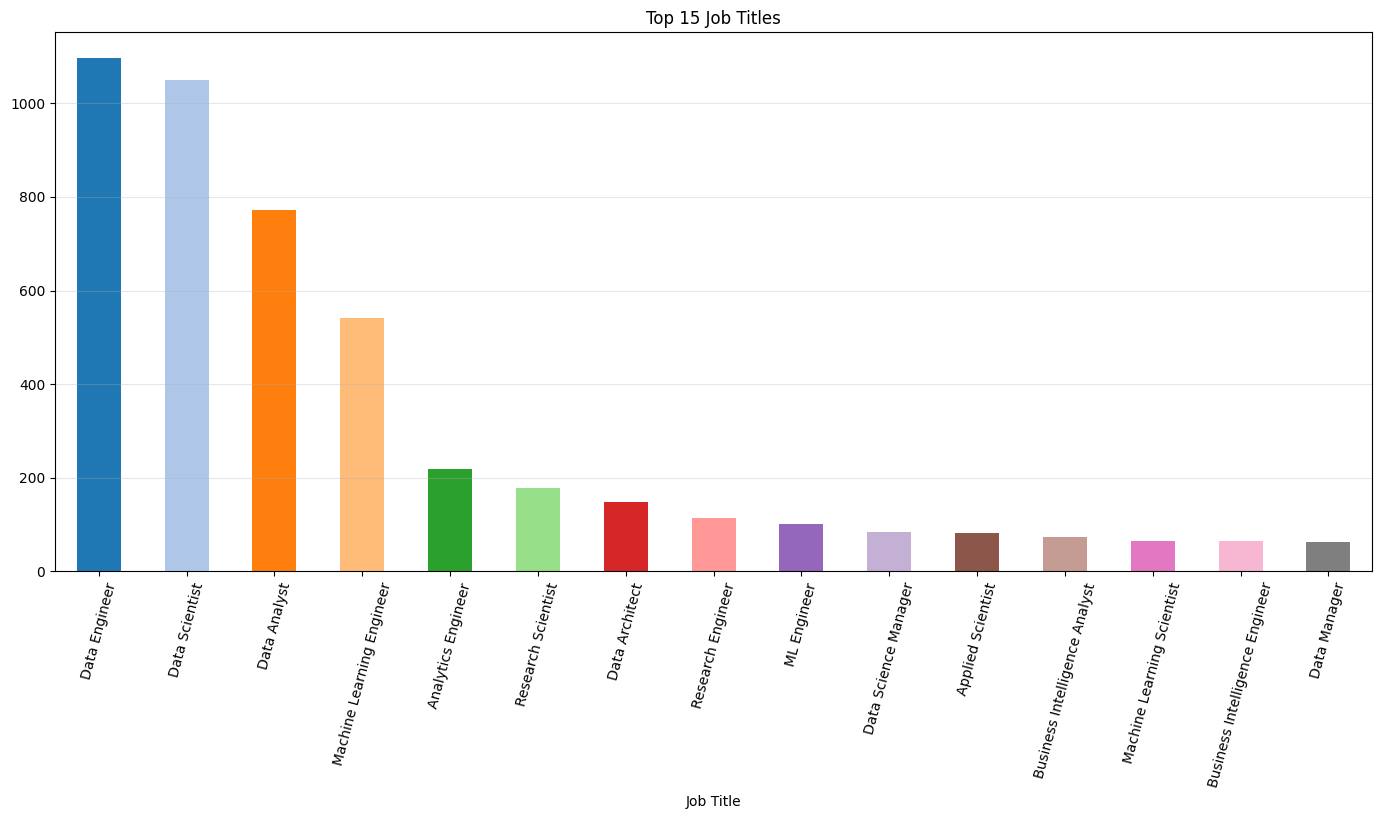

In [111]:
plt.figure(figsize = (17, 7))
top15_JobTitle = salarios["Job Title"].value_counts()[:15]
top15_JobTitle.plot(kind = 'bar',  color = sns.color_palette('tab20'), rot = 75)
plt.grid(axis='y', alpha=0.3)
plt.title('Top 15 Job Titles')

## Qual a media de salario por área de atuação?

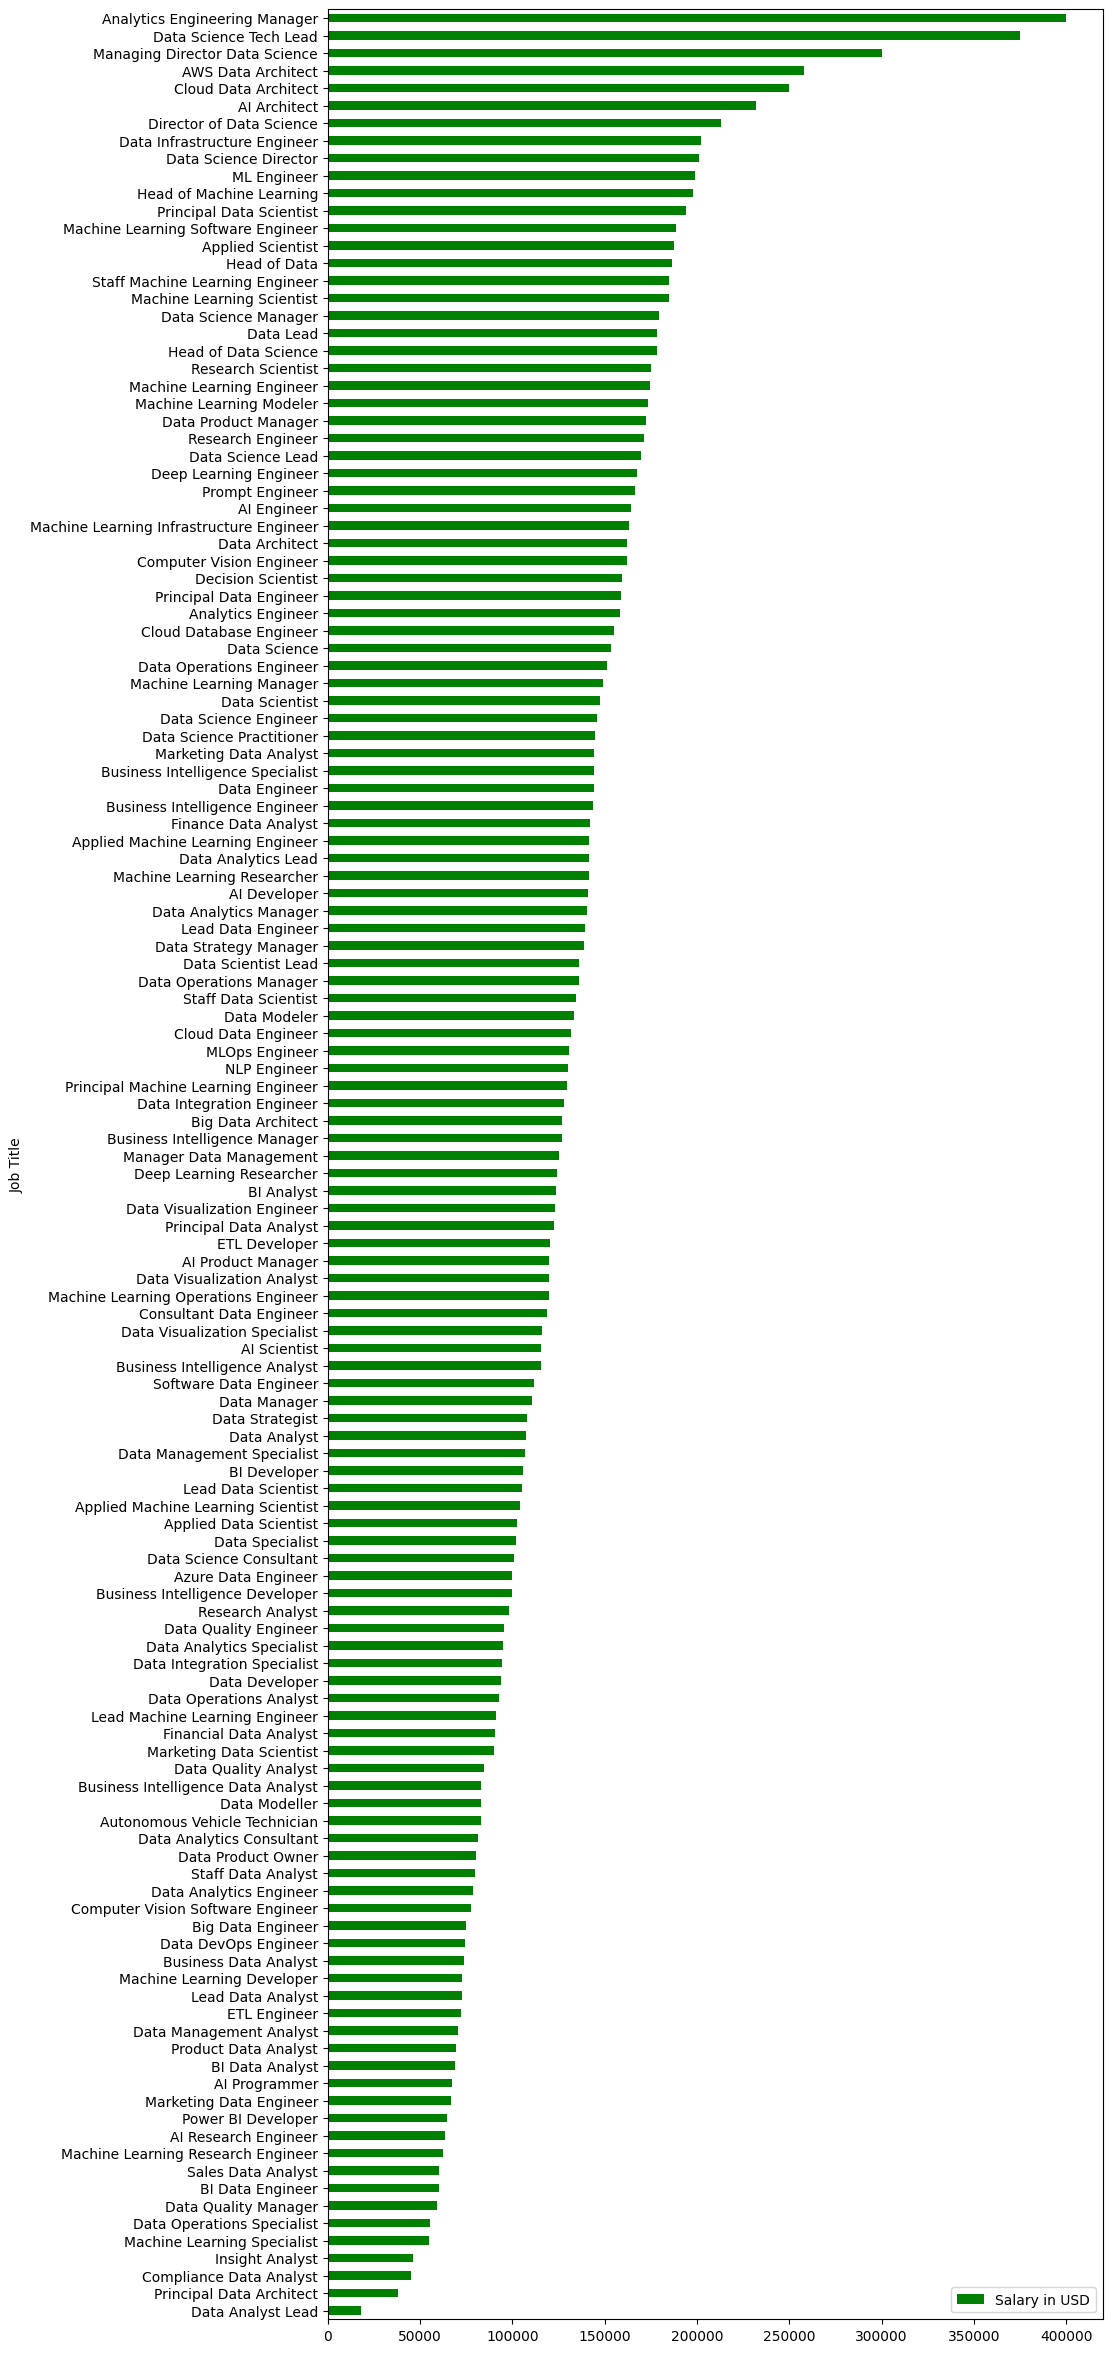

In [23]:
salario_area = salarios.groupby('Job Title')[['Salary in USD']].mean().sort_values('Salary in USD')
salario_area.plot(kind='barh', figsize=(10, 30), color ='green');

Text(0.5, 1.0, 'Top 15 Salary')

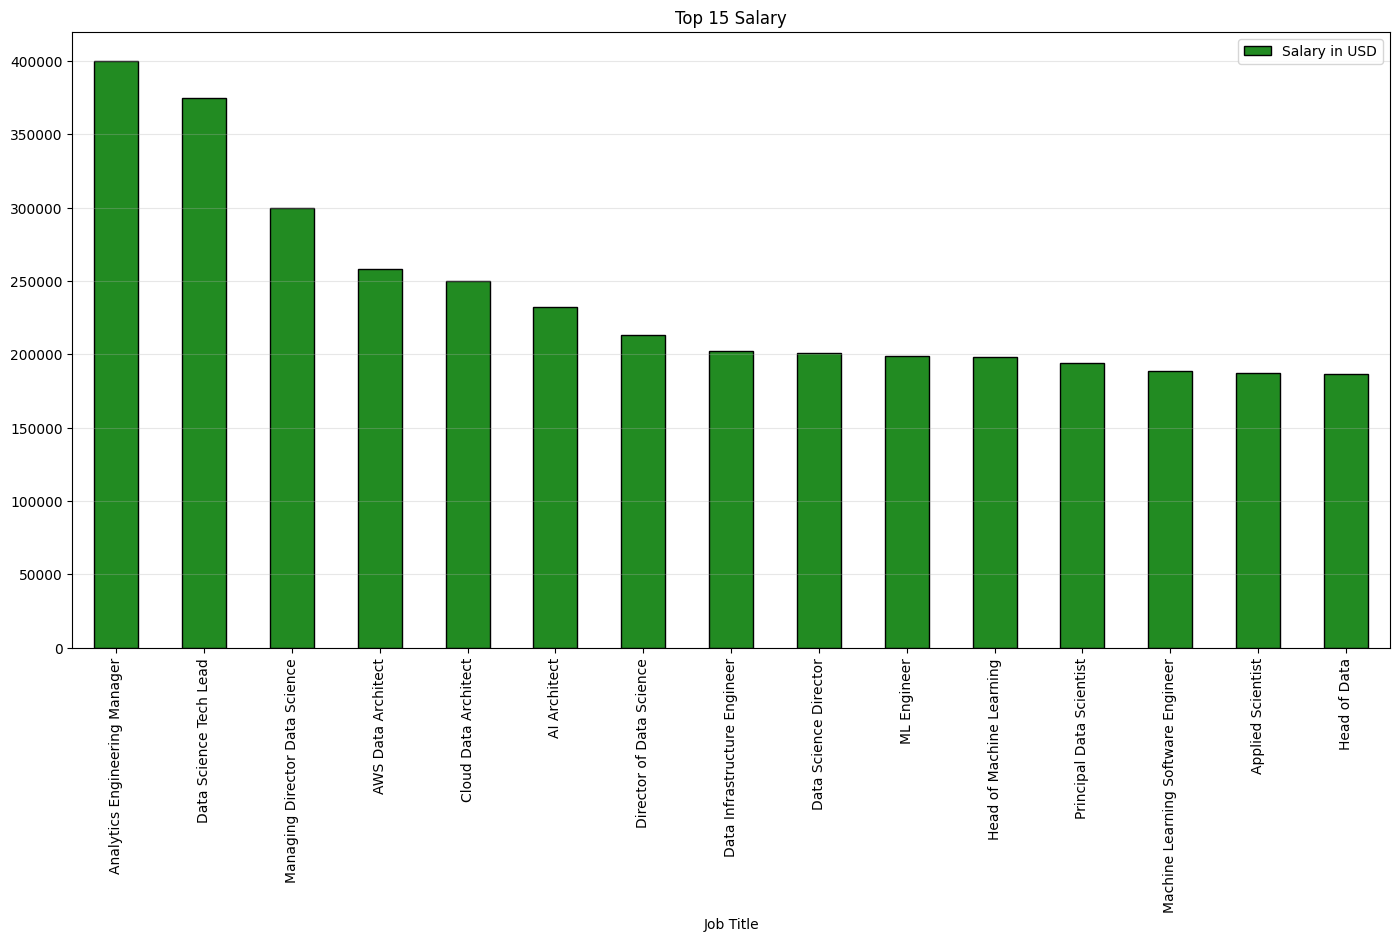

In [110]:
top15_Media_Salario = salario_area.sort_values('Salary in USD', ascending=False)[:15]
top15_Media_Salario.plot(kind = 'bar', color = 'forestgreen',  figsize=(17, 8), edgecolor = 'black', rot = 90)
plt.grid(axis='y', alpha=0.3)
plt.title('Top 15 Salary')

In [18]:
salarios.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


In [20]:
salarios_por_ano = salarios.groupby(['Job Title','Year'])['Salary in USD'].mean(numeric_only= True)
dfAno = pd.DataFrame(salarios_por_ano)
dfAno

Salary in USD
Job Title                       Year               
AI Architect                    2023  233656.000000
                                2024  229662.500000
AI Developer                    2022  275000.000000
                                2023  133266.823529
AI Engineer                     2023  165658.636364
...                                             ...
Staff Data Analyst              2020   29876.500000
                                2023  179998.000000
Staff Data Scientist            2020  164000.000000
                                2021  105000.000000
Staff Machine Learning Engineer 2021  185000.000000

[274 rows x 1 columns]

In [22]:
"""pivot = dfAno.pivot_table(index = 'Job Title', columns = 'Year', values = 'Salary in USD')
pivot
pivot.plot(subplots = True, figsize = (10,40));
"""

"pivot = dfAno.pivot_table(index = 'Job Title', columns = 'Year', values = 'Salary in USD')\npivot\npivot.plot(subplots = True, figsize = (10,40));\n"